In [1]:
import os
import sys
%matplotlib inline

import numpy as np
import pandas as pd
import ipywidgets
from scipy.optimize import Bounds
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data
from src import efficient_frontier
from src import plot
from src import portfolio
from src import capm
from src import backtesting
import numpy as np
import pandas as pd
import ipywidgets
from scipy.optimize import Bounds
import datetime
from dateutil import rrule
import yfinance as yf
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module='pandas')

In [2]:

"Weights is how you want to weigh the Enviromental, Social, and Governance score, they have to sum to one"
weights = np.array([1/3,1/3,1/3])

"The minimum ESG score is the lowest score a company can have for it to be included in your portfolio"
min_esg_score = 800

"The maximum ESG score is the highest ESG score a company can have for it to be included in your portfolio"
max_esg_score = 1000

"This is the ESG data for the companies you want included in the portfolio optimization"
df = pd.read_excel('../data/ESG_DATA_S&P500.xlsx')

"The bounds are how willing to go short or long in one stock"
Bounds1 = Bounds(-0.5,1.5) 

"Wanted return is used if you want to optimize on a perticular return"
Wanted_return = 0.05

"Maximum risk is either used when optimizing using risk as a constraint or when creating a cml portfolio"
maximum_risk = 0.02

"What optimization type you want to use: 'No_extra_constraint' you only optimize based on sharpe ratio",
"'Maximum_risk' you constrain the optimizer on a certain risk level",
"'Wanted_return' you constrain the optimizer on a certain return level"
"'No_extra_constraint' you only constrain on optimizing on max sharp ration"
sharpe_type = "No_extra_constraint" 

"What you beleive your risk free rate to be"
risk_free_rate = 0.01

"If you want to rebalance with a monthly or yearly frequency"
rebalancing_freq = 'monthly'



In [3]:
strategy1 = {'df': df,
 'weights': weights,
 'min_esg_score': min_esg_score,
 'max_esg_score': max_esg_score,
 'bounds': Bounds1,
 'sharpe_type': sharpe_type,
 'wanted_return': Wanted_return,
 'maximum_risk': maximum_risk,
 'rebalancing_freq': rebalancing_freq,
 'risk_free_rate': risk_free_rate}


In [4]:
"First input is your investment strategy,",
"Second input is whether you are doing monthly or yearly rebalancing",
"Third input is the amount of months or years between each rebalancing",
"Fourth input is the first date of your rebalancing, should always be the first of the month, the format is 'YYYY-MM-DD",
"Fifth input is the amount of months you want to have the covariance window be",
"Sixth input is the amount of years you want the covariance window to be",
"Seventh input is the market that you want to benchmark your portfolio on"

data5 = backtesting.backtesting(strategy1,
                                'monthly',
                                6,
                                '2010-01-01',
                                '2022-01-01',
                                0,
                                6,
                                '^GSPC')


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:82: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  pct = data.pct_returns_from_prices(stock_data)[start_date-covariance_window_time_delta:end_date+relativedelta(years=rebalancing_freq+1)]
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timez

Excpected return on investment is 1.0702151428364215%
Has calculated portfolio 1


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 0.9607762657236434%
Has calculated portfolio 2


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.4505696038585347%
Has calculated portfolio 3


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 0.8474004745120124%
Has calculated portfolio 4


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 11.055697427689552%
Has calculated portfolio 5


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.0823839771681574%
Has calculated portfolio 6


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.1195555906261814%
Has calculated portfolio 7


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.8185393070860396%
Has calculated portfolio 8


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.1494680637401662%
Has calculated portfolio 9


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 0.9689127663187929%
Has calculated portfolio 10


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 0.8259766519956154%
Has calculated portfolio 11


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 0.8316519950084496%
Has calculated portfolio 12


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 0.6967784178735164%
Has calculated portfolio 13


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 0.9951752431904749%
Has calculated portfolio 14


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.1028855202625443%
Has calculated portfolio 15


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.069966572555609%
Has calculated portfolio 16


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.4704795519119593%
Has calculated portfolio 17


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 0.9267925461327304%
Has calculated portfolio 18


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is -0.03525706713115098%
Has calculated portfolio 19


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.1812247760061954%
Has calculated portfolio 20


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.0122663512728876%
Has calculated portfolio 21


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 0.9252740897409174%
Has calculated portfolio 22


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.2185506099242234%
Has calculated portfolio 23


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

Excpected return on investment is 1.2381532096905545%
Has calculated portfolio 24
Excpected return on investment is 0.9768878564056436%
Has calculated portfolio 25


c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:203: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  betas_of_portfolios.append(capm.calculate_portfolio_beta(pct[start_date-covariance_window_time_delta:start_date],prices[start_date-covariance_window_time_delta:start_date],list_of_port_weights[i],market_name))
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:207: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  list_of_portfolio_actual_returns.append((portfolio.portfolio_return(prices.loc[start_date+delta],list_of_port_weights[i])
c:\Users\Tor Osted\OneDrive\Dokumenter\GitHub\BachelorThesis\src\backtesting.py:208: FutureWarning: Indexing a timezone-aware Date

In [5]:
print('amount of stocks in portfolio',data5['portfolio_weights'][0].size)

amount of stocks in portfolio 37


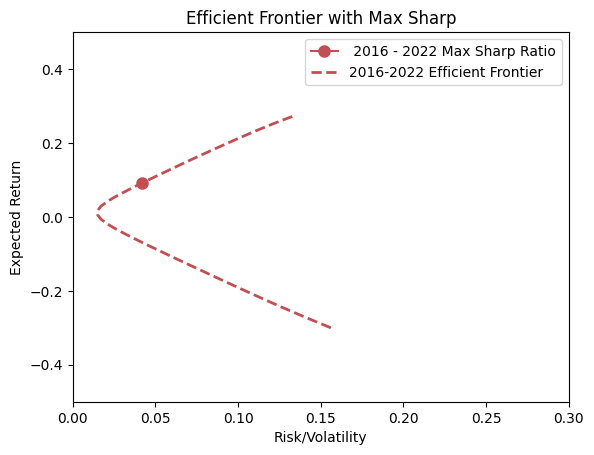

In [6]:
plot.plot_efficient_frontier(data5['portfolio_parameters'][-1],2016,2022,risk_free_rate,False,True)


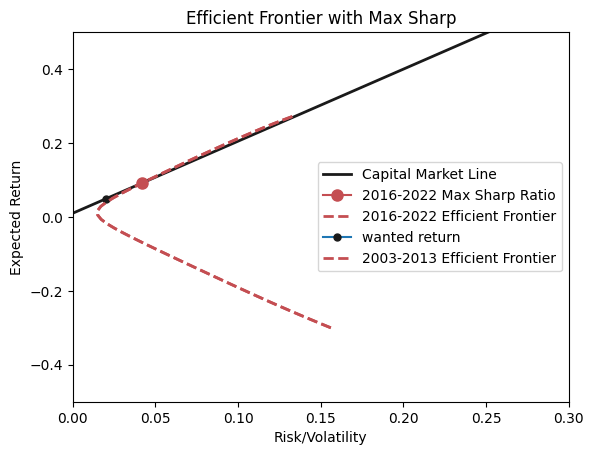

In [7]:

plot.plot_efficient_frontier_cml(data5['portfolio_parameters'][-1],2016,2022,risk_free_rate,True,maximum_risk)

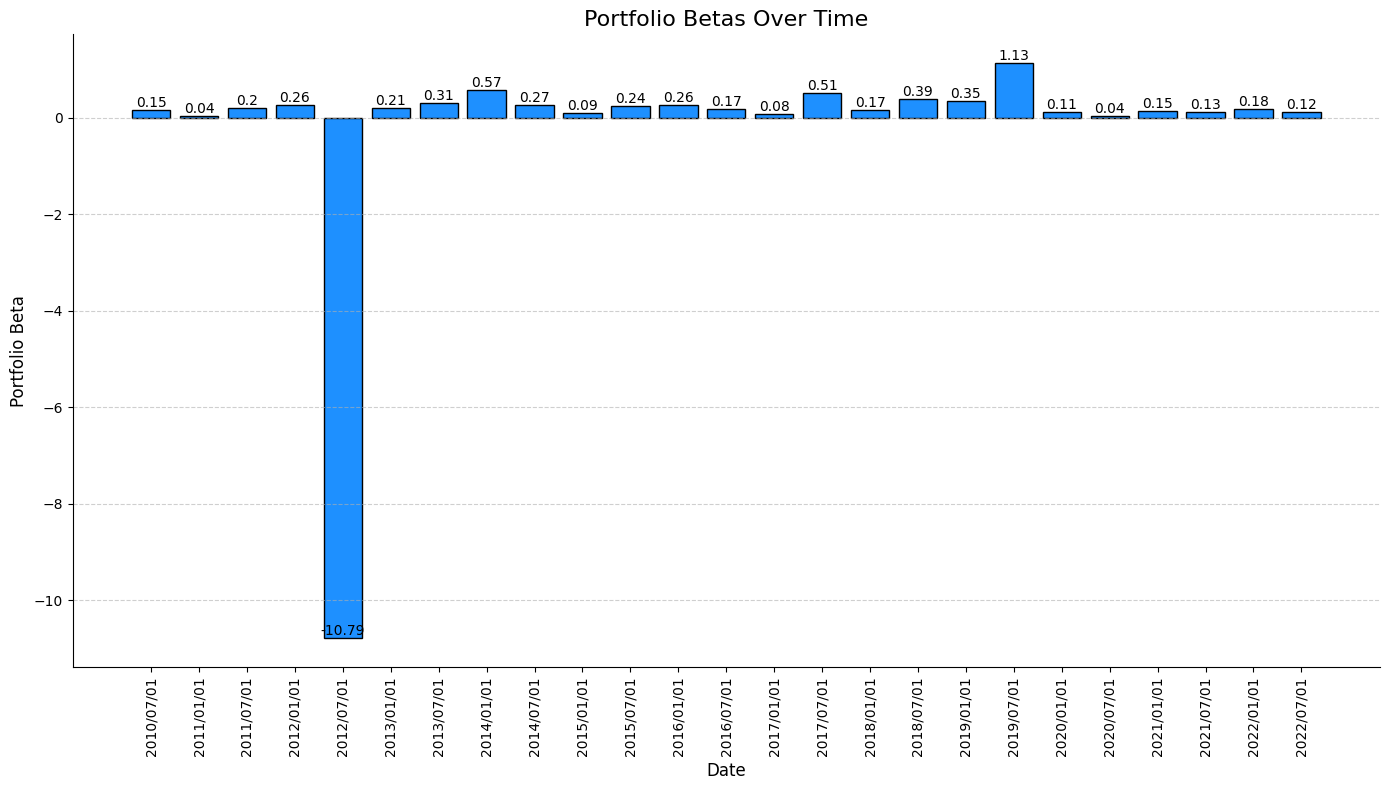

In [8]:
plot.plot_portfolio_betas(data5['return_dates'], data5['betas_of_portfolios'])


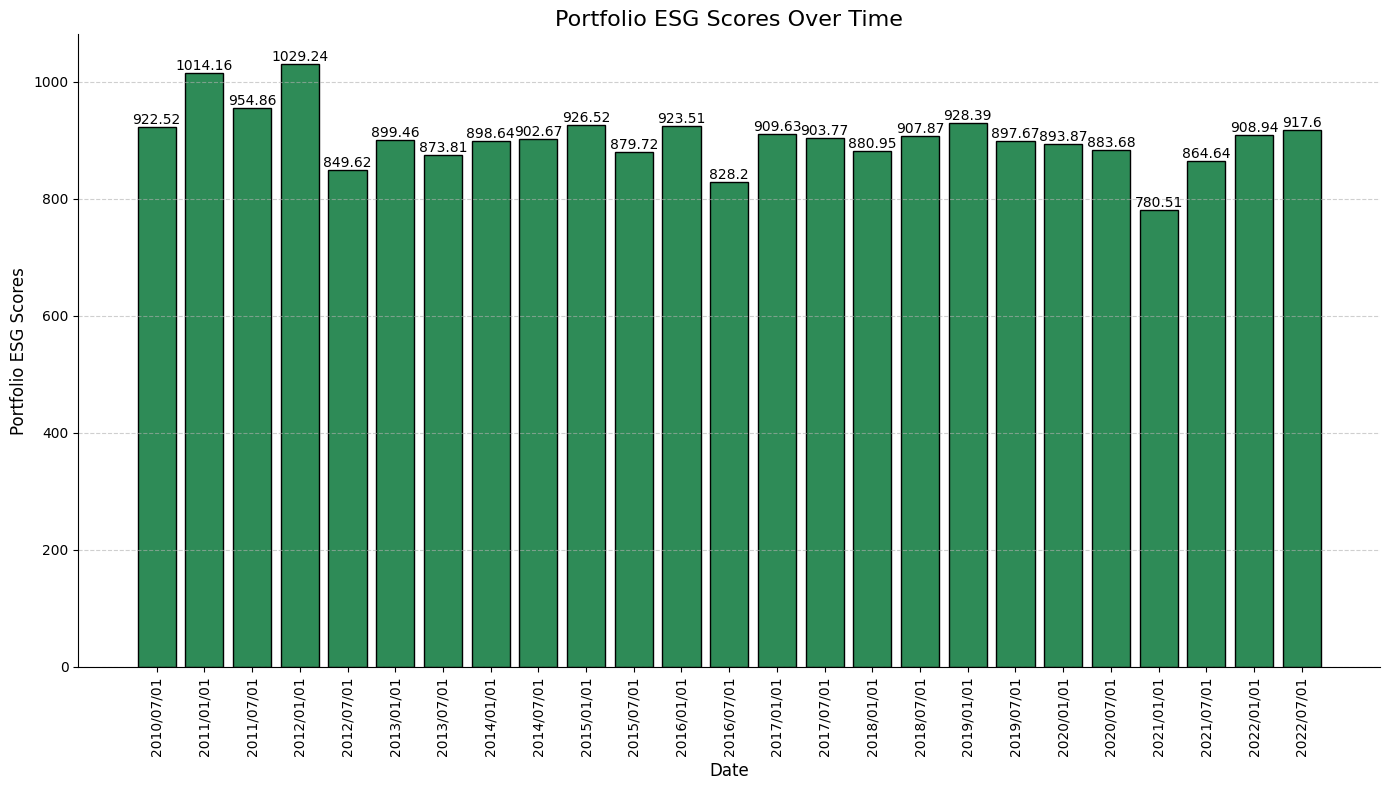

In [9]:
plot.plot_portfolio_esg_scores(data5['return_dates'],data5['portfolio_esg_scores'])

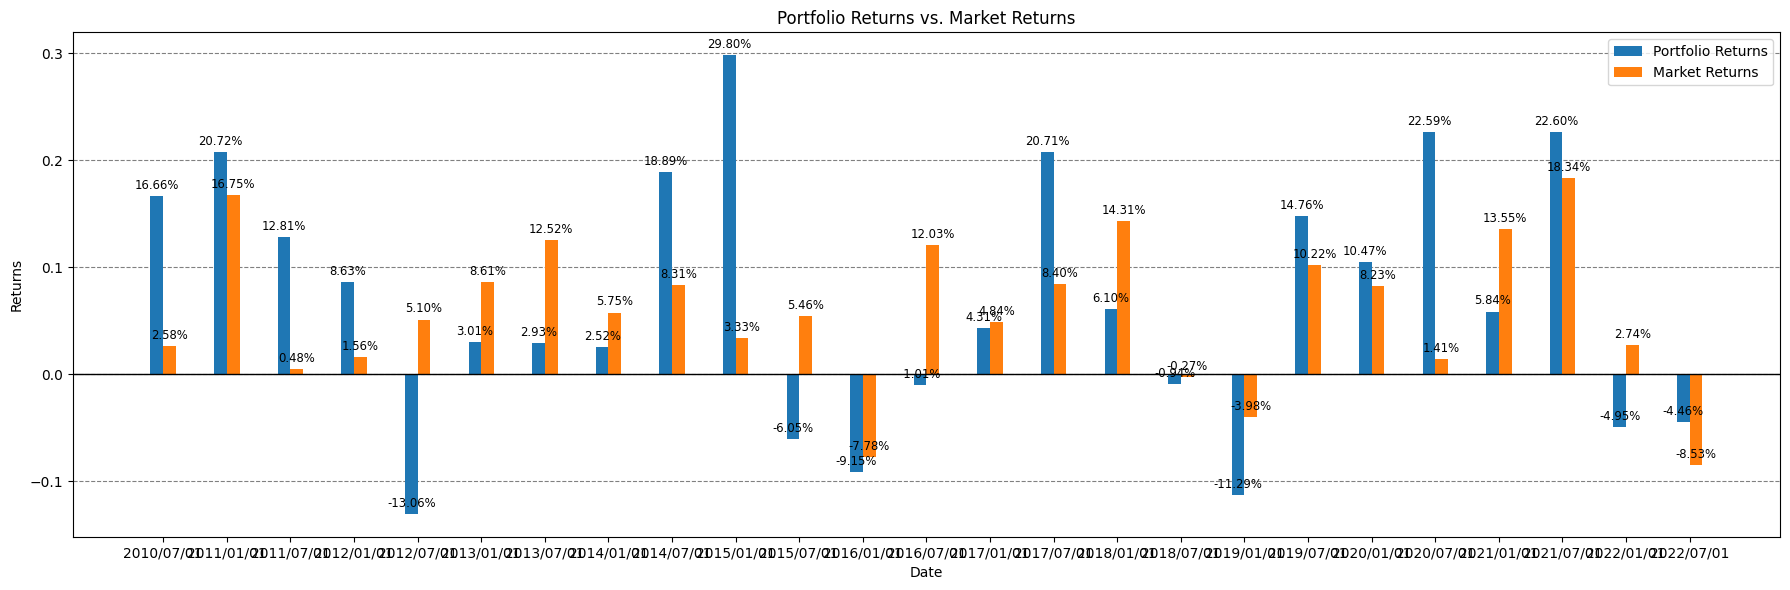

In [10]:
"Our portfolio returns compared to the market returns for each recalibration",

"First parameter is the portfolio date",

"Second parameter is the portfolio returns",
"change to data5['portfolio_actual_returns_cmle'] if you want cml returns and data5['portfolio_actual_returns'] if you want normal portfolio returns",

"Third parameter is the market returns"


plot.compare_returns1(data5['return_dates'],
                      np.concatenate(data5['portfolio_actual_returns']),
                      data5['pct_returns_sp500'])


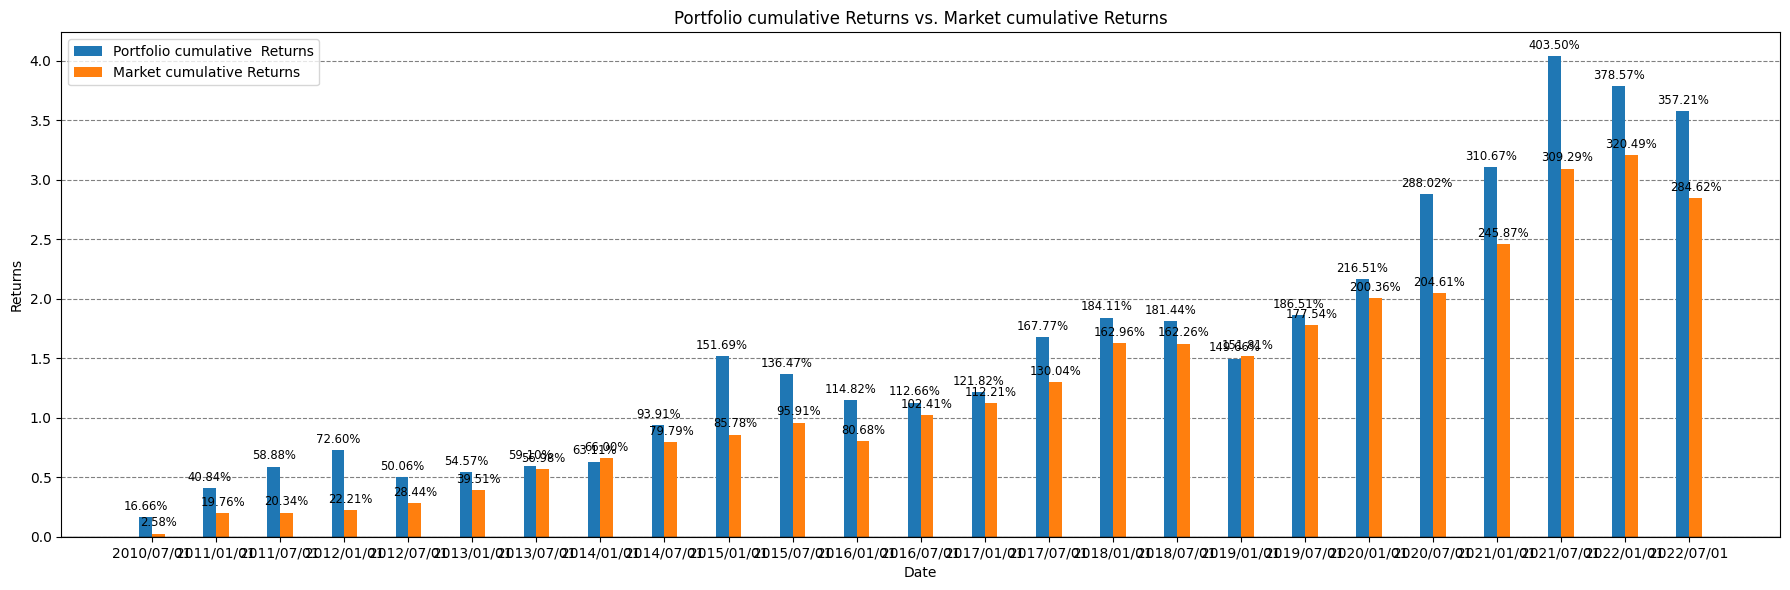

In [11]:
#Data[10] is the cml returns
"Our portfolio cumulative returns compared to the market returns for each recalibration",
"First parameter is portfolio dates",
"Second parameter is the cumulative portfolio returns"
"Change data5['cumulative_portfolio_return_list'] to data5['cumulative_cml_return_list'] if you want to change to cml"
"third parameter is cumulative market returns"
plot.compare_cumulative_returns(data5['return_dates'],
                                np.concatenate(data5['cumulative_portfolio_return_list']),
                                data5['cumulative_market_return_list'])

